In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.utils.np_utils import to_categorical 
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Load Data

In [3]:
# Load data
train = pd.read_csv('D:/Users/owner/Desktop/Kaggle/train.csv')
test = pd.read_csv('D:/Users/owner/Desktop/Kaggle/test.csv')

In [3]:
# Load data
#train = pd.read_csv('../input/digit-recognizer/train.csv')
#test = pd.read_csv('../input/digit-recognizer/test.csv')

In [45]:
submission =  pd.read_csv('D:/Users/owner/Desktop/Kaggle/sample_submission.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# View data dimensions
data.shape

(42000, 785)

## Data Preprocessing

In [6]:
# build up "labels"
labels = data['label']
labels = np.array(labels)
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [7]:
# Delete label in the data
del data['label']
data.shape

(42000, 784)

In [8]:
# Split data for train and prediction datasets
data = data / 255
test = test / 255

In [9]:
# Data shape
print(data.shape)
print(labels.shape)
print(test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [10]:
# Reshape the data
data = np.array(data).reshape(-1, 28, 28)
data.shape

(42000, 28, 28)

In [11]:
# Add dimension
data = np.expand_dims(data,axis=-1)
labels = np.expand_dims(labels,axis=-1)

In [12]:
data.shape

(42000, 28, 28, 1)

In [13]:
labels.shape

(42000, 1)

In [14]:
# labels category
labels = to_categorical(labels, num_classes = 10)

In [15]:
# Check the shape
print(data.shape)
print(labels.shape)

(42000, 28, 28, 1)
(42000, 10)


In [16]:
# Convert test data
test = test.to_numpy().reshape(-1,28,28)
test = np.expand_dims(test,axis=-1)

test.shape

(28000, 28, 28, 1)

In [21]:
# Split data and labels for train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

In [22]:
# Check the shape for train data
print(X_train.shape)
print(y_train.shape)

(33600, 28, 28, 1)
(33600, 10)


In [23]:
# Check the shape for test data
print(X_test.shape)
print(y_test.shape)

(8400, 28, 28, 1)
(8400, 10)


## Model

In [30]:
# Build up model - Sequential (Convolutional Model)
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)        

In [32]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
#Add ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.2)
datagen.fit(X_train)

In [34]:
# Fit model
#model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=10)
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train)/32, epochs=10)

D:\Users\owner\Desktop\WPy64-3870\python-3.8.7.amd64\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1050/1050 [==============================] - 88s 78ms/step - loss: 0.5088 - accuracy: 0.8330
Epoch 2/10
1050/1050 [==============================] - 91s 86ms/step - loss: 0.1563 - accuracy: 0.9552
Epoch 3/10
1050/1050 [==============================] - 86s 82ms/step - loss: 0.1195 - accuracy: 0.9667
Epoch 4/10
1050/1050 [==============================] - 95s 91ms/step - loss: 0.1012 - accuracy: 0.97150s - loss: 0.1010 - accura
Epoch 5/10
1050/1050 [==============================] - 152s 145ms/step - loss: 0.0832 - accuracy: 0.9760
Epoch 6/10
1050/1050 [==============================] - 139s 132ms/step - loss: 0.0792 - accuracy: 0.9775
Epoch 7/10
1050/1050 [==============================] - 114s 109ms/step - loss: 0.0732 - accuracy: 0.9793
Epoch 8/10
1050/1050 [==============================] - 125s 119ms/step - loss: 0.0694 - accuracy: 0.9809
Epoch 9/10
1050/1050 [==============================] - 152s 145ms/step - loss: 0.0640 - accuracy: 0.9818
Epoch 10/10
1050/1050 [=====

In [35]:
# Evaluation
model.evaluate(X_test,y_test)

263/263 [==============================] - 10s 33ms/step - loss: 0.0521 - accuracy: 0.9855


[0.05209454149007797, 0.9854761958122253]

In [37]:
# Predict data
predictions = model.predict(test)
y_pred = np.argmax(predictions, axis=1)

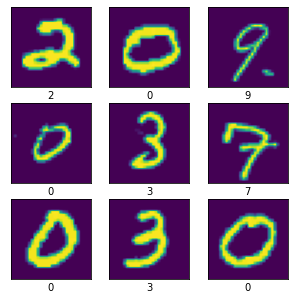

In [44]:
# Show some prediction
plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_pred[i])

In [46]:
# Save data
submission['Label'] = pd.DataFrame(y_pred)
submission.to_csv('D:/Users/owner/Desktop/submission.csv', index = False)

In [ ]:
# Save data
#submission['Label'] = pd.DataFrame(y_pred)
#submission.to_csv('./DRSubmissions.csv', index = False)